In [259]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats as sm
import sklearn

In [190]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.width',500)

In [160]:
df= pd.read_csv('kc_housingdata.csv')

In [161]:
df.shape

(21613, 21)

In [162]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

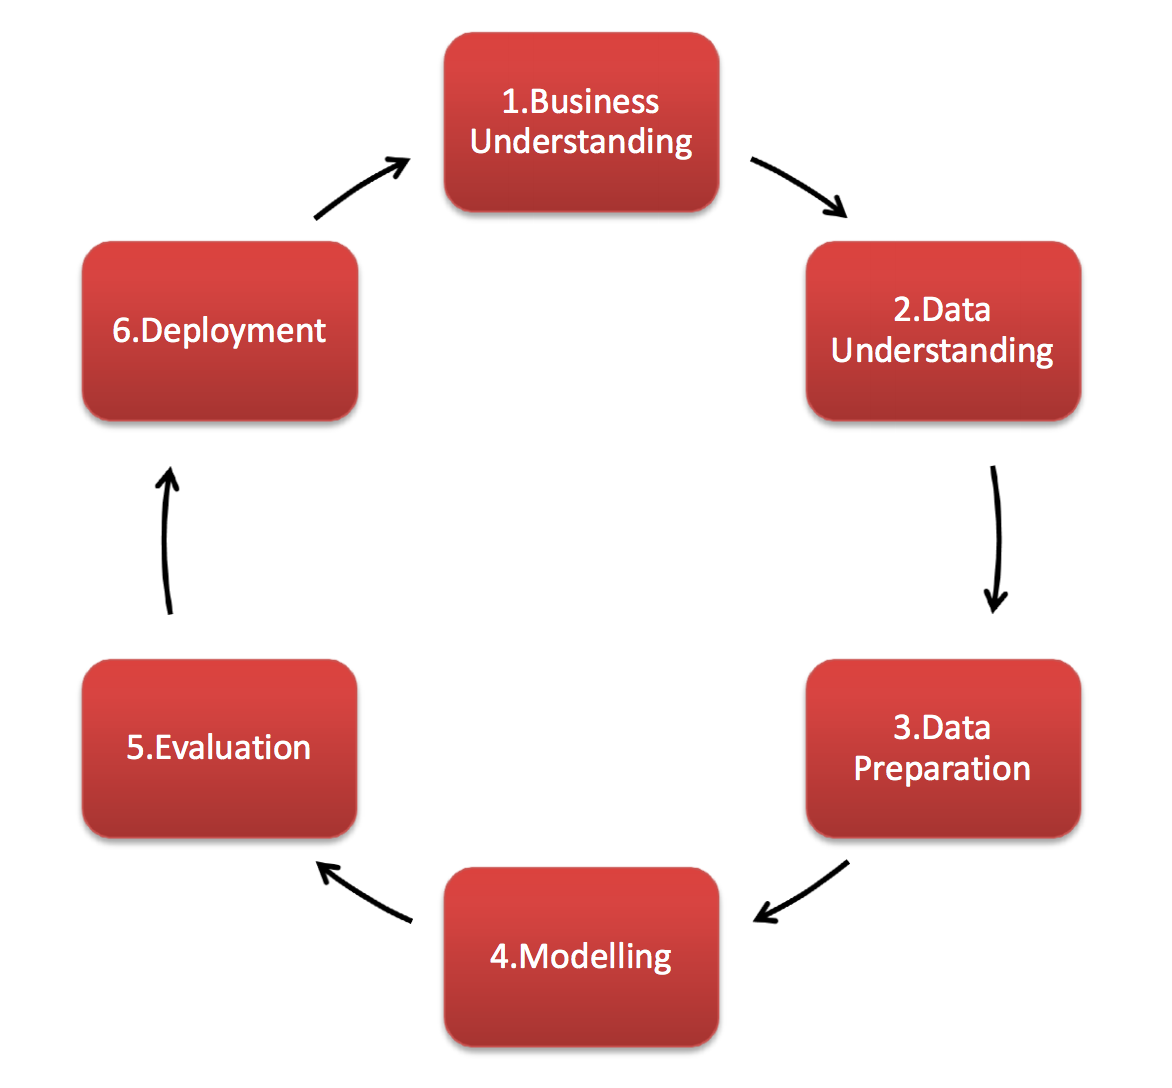

In [ ]:
df.drop('id',axis=1,inplace=True)

In [164]:
df.yr_renovated.value_counts(normalize=True)

0       0.957711
2014    0.004210
2013    0.001712
2003    0.001666
2005    0.001619
          ...   
1951    0.000046
1959    0.000046
1948    0.000046
1954    0.000046
1944    0.000046
Name: yr_renovated, Length: 70, dtype: float64

In [165]:
def year(x):
    if x==0: return 0
    if x!=0: return 1  
df['renovated_status']=df.yr_renovated.apply(year)

In [192]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_status,building_age,current_yr,house_age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,59,2014,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,63,2014,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,82,2015,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,49,2014,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,28,2015,28


In [193]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated_status', 'building_age', 'current_yr', 'house_age'], dtype='object')

In [195]:
df.shape

(21613, 19)

In [196]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_status,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,0,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,1,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,0,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,0,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,0,28


In [189]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_status,building_age,current_yr,house_age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,0,59,2014,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,1,63,2014,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,0,82,2015,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,0,49,2014,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,0,28,2015,28


## Data Understanding 

## Descriptive analytics

In [198]:
df.describe().apply(lambda s:s.apply('{0:6f}'.format))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_status,house_age
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.042289,43.317818
std,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,0.138564,0.140828,685.391304,27304.179631,0.201253,29.375493
min,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,-1.000000
25%,321950.000000,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,18.000000
50%,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,40.000000
75%,645000.000000,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,63.000000
max,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,115.000000


<AxesSubplot:ylabel='price'>

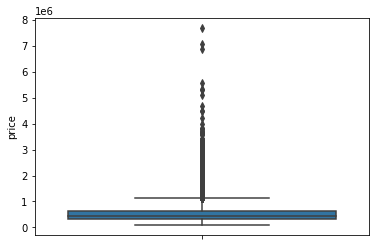

In [168]:
sns.boxplot(y=df.price)

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

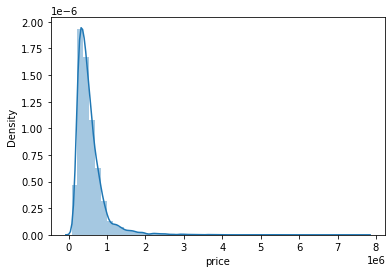

In [169]:
sns.distplot(df.price)

The price distribuition is right skewed. the mean of th hous price is more than the median. 
there are lot of houses on higher prices.

In [170]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [171]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [172]:
df.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [173]:
df.grade.value_counts(normalize=True)*100

7     41.553695
8     28.075695
9     12.099200
6      9.429510
10     5.246842
11     1.846111
5      1.119696
12     0.416416
4      0.134179
13     0.060149
3      0.013881
1      0.004627
Name: grade, dtype: float64

In [199]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated_status', 'house_age'], dtype='object')

In [175]:
current_yr= pd.to_datetime(df.date)
df['current_yr']= pd.DatetimeIndex(current_yr).year
df['house_age'] = df.current_yr - df.yr_built

In [182]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_status,building_age,current_yr
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0,59,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,1,63,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0,82,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,0,49,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0,28,2015


In [142]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_status,overall_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1970-01-01 00:00:00.000001955,0,98178,47.5112,-122.257,1340,5650,0,16355 days 23:59:59.999998045
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1970-01-01 00:00:00.000001951,1991,98125,47.7210,-122.319,1690,7639,1,16412 days 23:59:59.999998049
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1970-01-01 00:00:00.000001933,0,98028,47.7379,-122.233,2720,8062,0,16490 days 23:59:59.999998067
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1970-01-01 00:00:00.000001965,0,98136,47.5208,-122.393,1360,5000,0,16412 days 23:59:59.999998035
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1970-01-01 00:00:00.000001987,0,98074,47.6168,-122.045,1800,7503,0,16483 days 23:59:59.999998013


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  float64
 1   bedrooms          21613 non-null  int64  
 2   bathrooms         21613 non-null  float64
 3   sqft_living       21613 non-null  int64  
 4   sqft_lot          21613 non-null  int64  
 5   floors            21613 non-null  float64
 6   waterfront        21613 non-null  int64  
 7   view              21613 non-null  int64  
 8   condition         21613 non-null  int64  
 9   grade             21613 non-null  int64  
 10  sqft_above        21613 non-null  int64  
 11  sqft_basement     21613 non-null  int64  
 12  zipcode           21613 non-null  int64  
 13  lat               21613 non-null  float64
 14  long              21613 non-null  float64
 15  sqft_living15     21613 non-null  int64  
 16  sqft_lot15        21613 non-null  int64 

4 groups:

Groups 1 & 3: convert renovated age as numeric keeping 0 as yr built 

Group2 2 & 4: conver renovated yr as a categorical , keep 0 as 0 and the remaining values as 1

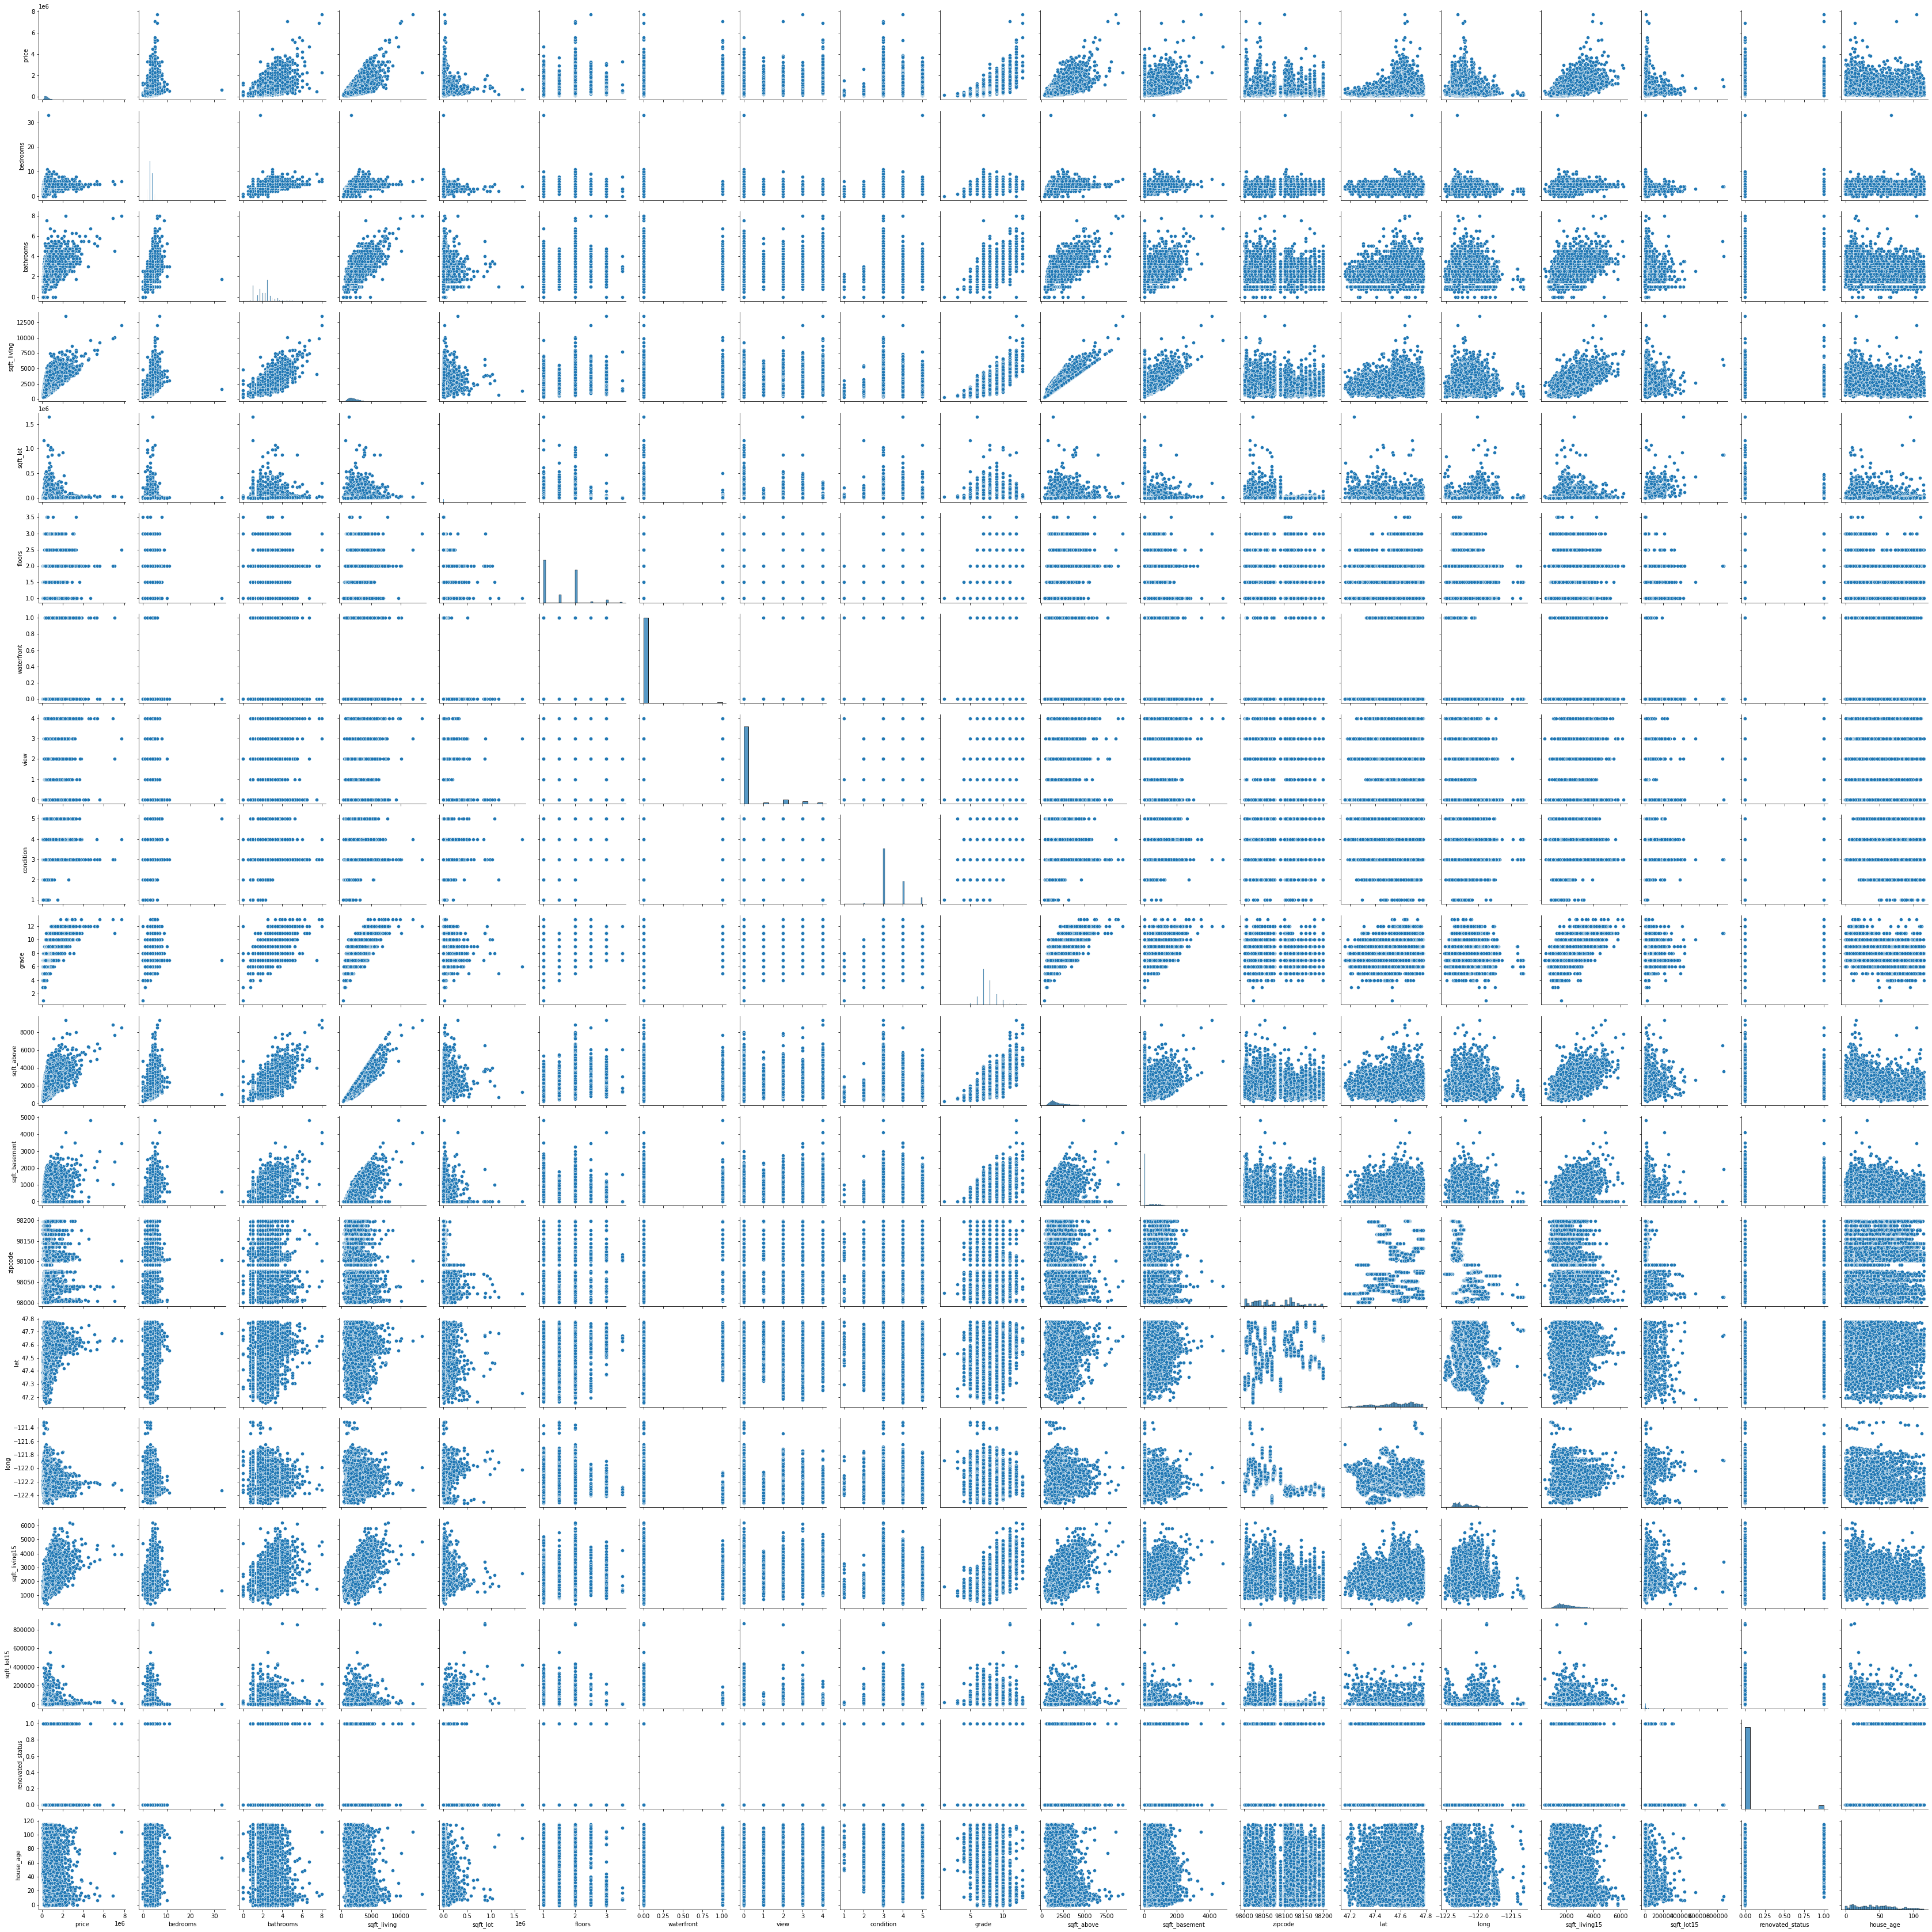

In [201]:
sns.pairplot(df)

In [194]:
df.drop(['date','yr_built', 'yr_renovated','building_age','current_yr'],axis=1, inplace=True)

In [208]:
plt.figure.figsize=(10,15)

<AxesSubplot:>

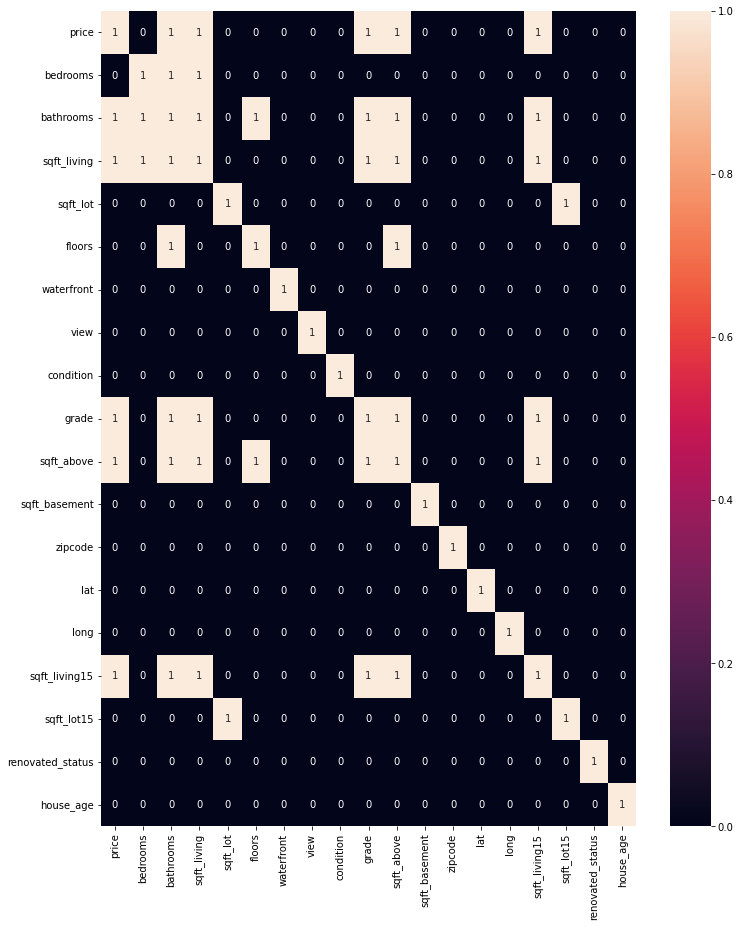

In [282]:
plt.figure(figsize=(12,15))
sns.heatmap(df.corr()>0.5, annot=True)

Scaling : 

In [215]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [216]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated_status', 'house_age'], dtype='object')

In [217]:
num_col= ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
          'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 
          'sqft_lot15', 'house_age']

In [218]:
dfn= df.copy()

In [219]:
dfn.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_status,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,0,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,1,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,0,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,0,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,0,28


In [221]:
for i in num_col:
    dfn[i]= rs.fit_transform(dfn[i].values.reshape(-1,1))

In [222]:
dfn.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_status,house_age
0,221900.0,0.0,-1.666667,-0.650045,-0.348442,-0.5,0,0,3,7,-0.372549,0.000000,1.329412,-0.292754,-0.133005,-0.574713,-0.395344,0,0.422222
1,538000.0,0.0,0.000000,0.587711,-0.066572,0.5,0,0,3,7,0.598039,0.714286,0.705882,0.720773,-0.438424,-0.172414,0.003813,1,0.511111
2,180000.0,-1.0,-1.666667,-1.015138,0.421742,-0.5,0,0,3,6,-0.774510,0.000000,-0.435294,0.802415,-0.014778,1.011494,0.088702,0,0.933333
3,604000.0,1.0,1.000000,0.044524,-0.463527,-0.5,0,0,5,7,-0.500000,1.625000,0.835294,-0.246377,-0.802956,-0.551724,-0.525788,0,0.200000
4,510000.0,0.0,-0.333333,-0.204809,0.081799,-0.5,0,0,3,8,0.117647,0.000000,0.105882,0.217391,0.911330,-0.045977,-0.023480,0,-0.266667


## Segregation of Target variable and Features

In [223]:
x= dfn.drop('price', axis=1)
y= dfn.price

In [224]:
from sklearn.model_selection import train_test_split

In [238]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=12)

In [239]:
x_train.shape

(17290, 18)

In [240]:
x_test.shape

(4323, 18)

In [241]:
y_train.shape

(17290,)

In [242]:
y_test.shape

(4323,)

In [243]:
from sklearn.linear_model import LinearRegression

In [244]:
lin_model = LinearRegression()
model1_rs= lin_model.fit(x_train,y_train)

In [249]:
model1_rs.coef_

array([-33734.90506239,  32034.22321263,  93755.54448154,   1355.68779146,
         3827.74723496, 611162.5648845 ,  52715.12667277,  26072.53294655,
        98135.50010388,  86735.07306659,  30031.61058007, -48721.71076849,
       123268.19116032, -44237.1522402 ,  23106.18922549,  -2299.95800152,
        32619.08076521, 116704.97695095])

In [251]:
model1_rs.score(x_train,y_train)

0.7033294532015849

In [264]:
pred_y= model1_rs.predict(x_test)

In [265]:
pred_y

array([278725.39740128, 104345.39202917, 261736.27883159, ...,
       424597.41030952, 499354.58992356, 765657.40092476])

In [266]:
y_test

2019     275000.0
3435     279000.0
15940    200500.0
9811     750000.0
18665    395000.0
           ...   
3390     579000.0
6801     599000.0
4775     248500.0
10634    645000.0
1529     810000.0
Name: price, Length: 4323, dtype: float64

In [267]:
model1_rs.score(x_test,y_test)

0.6865061731544676

In [257]:
from statsmodels.api import OLS
x_train = sm.add_constant(x_train)
model1_rs_ols= OLS(y_train,x_train).fit()


<IPython.core.display.Javascript object>

In [261]:
x_train.head()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_status,house_age
20359,1.0,1.0,0.333333,0.088157,-0.498938,0.5,0,0,3,8,0.440196,0.0,0.317647,-1.513043,0.147783,-0.048276,-0.565924,0,-0.844444
10461,1.0,-1.0,0.333333,-0.596616,-1.075071,0.5,0,0,3,7,-0.313725,0.0,0.505882,-0.040580,-0.334975,-0.367816,-1.033915,0,-0.733333
20047,1.0,0.0,0.333333,0.623330,-0.064093,0.5,0,0,3,9,1.029412,0.0,-0.376471,0.595169,0.246305,0.885057,-0.083082,0,-0.888889
10581,1.0,-1.0,-1.666667,-0.997329,1.165368,-0.5,0,0,3,7,-0.754902,0.0,1.447059,-0.544928,-0.270936,-0.471264,0.477624,0,0.511111
17749,1.0,-1.0,-1.666667,-1.086376,-0.428116,-0.5,0,0,3,6,-0.852941,0.0,0.835294,-0.076329,-0.812808,-0.528736,-0.385310,0,1.266667


In [258]:
model1_rs_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2409.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:17:18   Log-Likelihood:            -2.3526e+05
No. Observations:               17290   AIC:                         4.706e+05
Df Residuals:                   17272   BIC:                         4.707e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -3.29e+05   1.88e+04    -17.528      0.000   -3.66e+05   -2.92e+05
bedrooms         -3.373e+04   2045.246    -16.494      0.000   -3.77e+04   -2.97e+04
bathrooms         3.203e+04   2661.965     12.034      0.000    2.68e+04    3.73e+04
sqft_living       1.432e+05   2962.891     48.334      0.000    1.37e+05    1.49e+05
sqft_lot          1355.6878    301.348      4.499      0.000     765.015    1946.360
floors            3827.7472   3912.617      0.978      0.328   -3841.379    1.15e+04
waterfront        6.112e+05   1.91e+04     32.023      0.000    5.74e+05    6.49e+05
view              5.272e+04   2339.814     22.530      0.000    4.81e+04    5.73e+04
condition         2.607e+04   2571.834     10.138      0.000     2.1e+04    3.11e+04
grade             9.814e+04   2350.516     41.751      0.000    9.35e+04    1.03e+05
sqft_above        4.182e+04   3929.463     10.642      0.000    3.41e+04    4.95e+04
sqft_basement     5370.8033   2594.581      2.070      0.038     285.162    1.05e+04
zipcode          -4.872e+04   3063.184    -15.906      0.000   -5.47e+04   -4.27e+04
lat               1.233e+05   2417.631     50.987      0.000    1.19e+05    1.28e+05
long             -4.424e+04   2933.156    -15.082      0.000      -5e+04   -3.85e+04
sqft_living15     2.311e+04   3268.120      7.070      0.000    1.67e+04    2.95e+04
sqft_lot15       -2299.9580    418.314     -5.498      0.000   -3119.896   -1480.020
renovated_status  3.262e+04   7940.712      4.108      0.000    1.71e+04    4.82e+04
house_age         1.167e+05   3573.118     32.662      0.000     1.1e+05    1.24e+05
==============================================================================
Omnibus:                    13263.516   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           862677.421
Skew:                           3.144   Prob(JB):                         0.00
Kurtosis:                      37.028   Cond. No.                     4.97e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.21e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [260]:
st.f.sf(2409, 17,17272)

0.0

In [269]:
import statsmodels.api as sm
x_test = sm.add_constant(x_test)
model1_rs_ols_test= OLS(y_test,x_test).fit()
model1_rs_ols_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     580.3
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:49:47   Log-Likelihood:                -59235.
No. Observations:                4323   AIC:                         1.185e+05
Df Residuals:                    4305   BIC:                         1.186e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.696e+05   4.15e+04     -6.501      0.000   -3.51e+05   -1.88e+05
bedrooms         -4.451e+04   4755.819     -9.359      0.000   -5.38e+04   -3.52e+04
bathrooms         2.991e+04   5919.237      5.054      0.000    1.83e+04    4.15e+04
sqft_living       1.696e+05   6468.168     26.221      0.000    1.57e+05    1.82e+05
sqft_lot         -1551.1728    616.893     -2.514      0.012   -2760.601    -341.744
floors            1.906e+04   8796.600      2.167      0.030    1816.504    3.63e+04
waterfront        4.671e+05   4.08e+04     11.438      0.000    3.87e+05    5.47e+05
view              5.314e+04   5139.015     10.341      0.000    4.31e+04    6.32e+04
condition         2.586e+04   5622.285      4.600      0.000    1.48e+04    3.69e+04
grade             8.909e+04   5190.577     17.165      0.000    7.89e+04    9.93e+04
sqft_above        7.881e+04   8701.373      9.058      0.000    6.18e+04    9.59e+04
sqft_basement     2.807e+04   5611.103      5.003      0.000    1.71e+04    3.91e+04
zipcode          -5.185e+04   6736.027     -7.698      0.000   -6.51e+04   -3.86e+04
lat               1.291e+05   5442.564     23.725      0.000    1.18e+05     1.4e+05
long              -3.94e+04   6241.216     -6.312      0.000   -5.16e+04   -2.72e+04
sqft_living15     -329.0077   7315.060     -0.045      0.964   -1.47e+04     1.4e+04
sqft_lot15        -771.0594    755.147     -1.021      0.307   -2251.536     709.417
renovated_status  6.793e+04   1.78e+04      3.817      0.000     3.3e+04    1.03e+05
house_age         1.275e+05   7841.698     16.255      0.000    1.12e+05    1.43e+05
==============================================================================
Omnibus:                     4222.807   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           663551.884
Skew:                           4.295   Prob(JB):                         0.00
Kurtosis:                      63.084   Cond. No.                     3.75e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model Analysis- Evaluation of the model

### Testing the Assumptions 

In [ ]:
## Linearity

In [270]:
errors= y_test-pred_y

In [271]:
residual= model1_rs_ols_test.resid

In [272]:
errors.describe()

count    4.323000e+03
mean     4.840964e+03
std      2.194469e+05
min     -1.307021e+06
25%     -9.464312e+04
50%     -7.553444e+03
75%      8.106587e+04
max      4.436541e+06
Name: price, dtype: float64

In [273]:
residual.describe()

count    4.323000e+03
mean     5.458567e-11
std      2.160893e+05
min     -1.244321e+06
25%     -1.035952e+05
50%     -5.831742e+03
75%      8.743283e+04
max      3.911706e+06
dtype: float64

In [290]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [291]:
##performance metrices : MAE, MAPE,MSE,RMSE  
mae = mean_absolute_error(y_test, pred_y)
mape= mean_absolute_percentage_error(y_test, pred_y)
mse= mean_squared_error(y_test, pred_y)
rmse= mean_squared_error(y_test, pred_y, squared=False)
print(mae, mape,mse,rmse)

127619.31428621049 0.25426683229434555 48169231013.253395 219474.8983671103


<AxesSubplot:ylabel='price'>

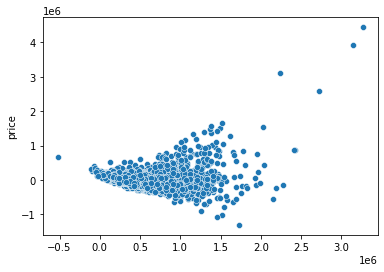

In [281]:
sns.scatterplot(x=pred_y,y=errors)

1. No linearity 
2. Hetroskedasticity
3. No normality
4. impact of outliers 

<AxesSubplot:xlabel='price', ylabel='price'>

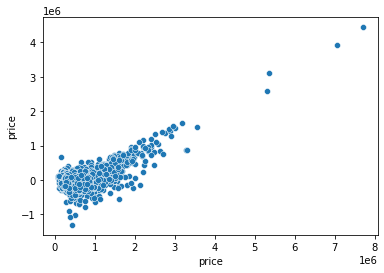

In [278]:
sns.scatterplot(x=y_test,y=errors)

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='price'>

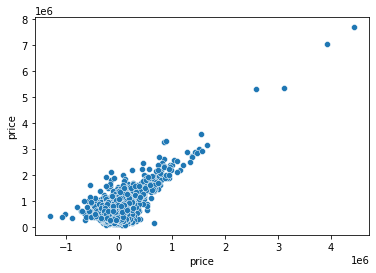

In [280]:
sns.scatterplot(errors, y_test)

In [283]:
dfn.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated_status', 'house_age'], dtype='object')

In [285]:
dfn_numeric= dfn[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
             'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 
              'sqft_living15', 'sqft_lot15', 'house_age']]

In [287]:
features= dfn_numeric.columns

In [286]:
dfn_numeric.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,0.0,-1.666667,-0.650045,-0.348442,-0.5,-0.372549,0.000000,1.329412,-0.292754,-0.133005,-0.574713,-0.395344,0.422222
1,0.0,0.000000,0.587711,-0.066572,0.5,0.598039,0.714286,0.705882,0.720773,-0.438424,-0.172414,0.003813,0.511111
2,-1.0,-1.666667,-1.015138,0.421742,-0.5,-0.774510,0.000000,-0.435294,0.802415,-0.014778,1.011494,0.088702,0.933333
3,1.0,1.000000,0.044524,-0.463527,-0.5,-0.500000,1.625000,0.835294,-0.246377,-0.802956,-0.551724,-0.525788,0.200000
4,0.0,-0.333333,-0.204809,0.081799,-0.5,0.117647,0.000000,0.105882,0.217391,0.911330,-0.045977,-0.023480,-0.266667


In [288]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF_values']= [variance_inflation_factor
                    (dfn_numeric.values,i)for i in range(dfn_numeric.shape[1])]
vif['features']= features

In [289]:
vif

,VIF_values,features
0,1.596240,bedrooms
1,3.257688,bathrooms
2,19.831971,sqft_living
3,2.098121,sqft_lot
4,1.979021,floors
5,14.704394,sqft_above
6,4.041223,sqft_basement
7,1.626079,zipcode
8,1.134831,lat
9,1.769884,long


since only 2 features : ' sqft_above' and sft_living are having high VIF values, driop these columns rebuild the model. 